# Agricultural Dataset
It explains the different commodities purchased across the state of Maharashtra

1.APMC : Agricultural Produce Marketing Committee. It is a categorical variable. Places of different APMC are in it.

2.Commodity : Names of commodities grown. Categorical.

3.Year : Year of collection of the commodity at APMC.

4.Month : Month of collection.

5.arrivals_in_qtl : Quantity if commodity collected in quintals.

6.min_price : Minimum price for the commodity.

7.max_price : Maximum price for the commodity.

8.modal_price : Target variable. Price given to farmers.

9.date : Date of collection.

10.district_name : Name of the district of APMC.

11.state_name : Name of state(Maharashtra)

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset into notebook
df = pd.read_csv(r'Downloads\Monthly_data_cmo.csv')

In [3]:
#First 5 rows
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [4]:
#Last 5 row
df.tail()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11,Ahmadnagar,Maharashtra
62428,Shrigonda,SUNFLOWER,2016,November,74,2933,3200,3067,2016-11,Ahmadnagar,Maharashtra


In [5]:
df.shape
#Here 62429 rows and 11 columns

(62429, 11)

# Exploratory Data Analysis

In [6]:
df.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [7]:
# Number of unique values in each columns
print("Column name : unique values")
for i in df.columns:
    print(i," : ",df[i].nunique())

Column name : unique values
APMC  :  349
Commodity  :  352
Year  :  3
Month  :  12
arrivals_in_qtl  :  11169
min_price  :  8503
max_price  :  9739
modal_price  :  9327
date  :  27
district_name  :  33
state_name  :  1


In [8]:
# 3 categories in Year.
df['Year'].value_counts()

2016    28971
2015    25557
2014     7901
Name: Year, dtype: int64

In [9]:
#Year in terms of modal_price.
df[['arrivals_in_qtl','min_price','max_price','modal_price']].groupby(df["Year"]).sum().sort_values(by="modal_price",ascending=False)

,arrivals_in_qtl,min_price,max_price,modal_price
Year,,,,
2016,167763619,86826086,111944031,99608865
2015,159554268,76236512,91808885,82570880
2014,49946074,20805015,26536030,23586488


In [10]:
# Top 10 districts in terms of model_price
df['modal_price'].groupby(df['district_name']).sum().sort_values(ascending=False).head(10)

district_name
Pune          17710875
Nagpur        12636741
Ahmadnagar    12242695
Mumbai        12002941
Solapur       11567353
Buldhana      10504472
Nasik         10167567
Amaravathi     9397075
Jalgaon        7849484
Satara         7343544
Name: modal_price, dtype: int64

In [11]:
# Highest modal_price month_wise
df['modal_price'].groupby(df['Month']).sum().sort_values(ascending=False).head(12)

Month
October      23335203
November     22729212
September    21257429
June         17793744
January      16146410
May          15763734
December     15663199
July         15181741
August       14756135
April        14578057
February     14442010
March        14119359
Name: modal_price, dtype: int64

In [12]:
## Creating a copy
df2=df.copy()

In [13]:
# Creating a dictionary of months
mon={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [14]:
#Mapping Month column with mon dictionary
df2['Month'] = df2['Month'].map(mon)

In [15]:
## Output
df2.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,4,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,4,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,4,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,4,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,4,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [16]:
df5=df2['Commodity'].groupby(df2['district_name']).count().reset_index(name='count').sort_values(by=['count'],ascending=False)

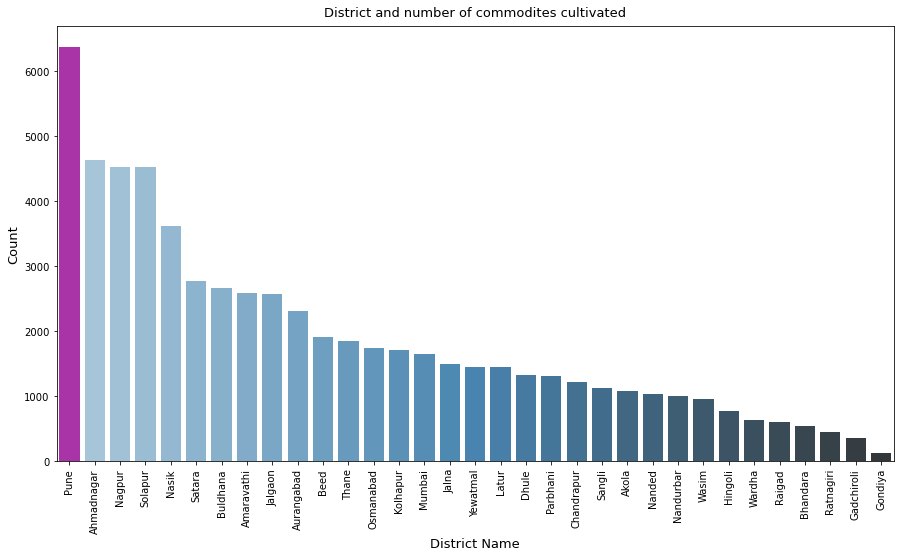

In [17]:
plt.figure(figsize=(15,8))
plt.title("District and number of commodites cultivated",fontsize=13,pad=10)
ax=sns.barplot(x="district_name", y="count", data=df5,palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("District Name",fontsize=13)
plt.ylabel("Count",fontsize=13)

patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

ax.patches[idx_tallest].set_facecolor('#a834a8') 

In [18]:
#From the given graph it shows the districts and its cultivation counts in Maharashtra
#Almost 28 districts have wide range of commodities cultivated or have more cultivated areas.

In [19]:
df6=df2['Commodity'].groupby(df2['Commodity']).count().reset_index(name="count").sort_values(by=['count'],ascending=False).head(30)

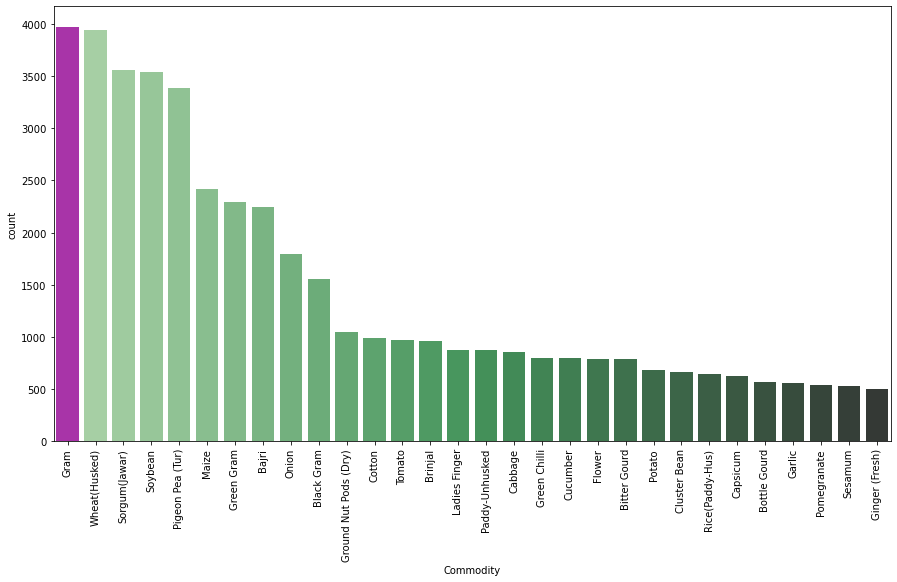

In [20]:
## Top 30 commodity production
plt.figure(figsize=(15,8))
ax2=sns.barplot(x="Commodity", y="count", data=df6,palette="Greens_d")
plt.xticks(rotation=90)

patch_h = []    
for patch in ax2.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

ax2.patches[idx_tallest].set_facecolor('#a834a8')  


In [21]:
#From graph it is identified that Gram is the most popular commodity cultivated in Maharashtra.
#Wheat is the major cereal cultivated in Maharashtra.

Text(0, 0.5, 'Modal Price')

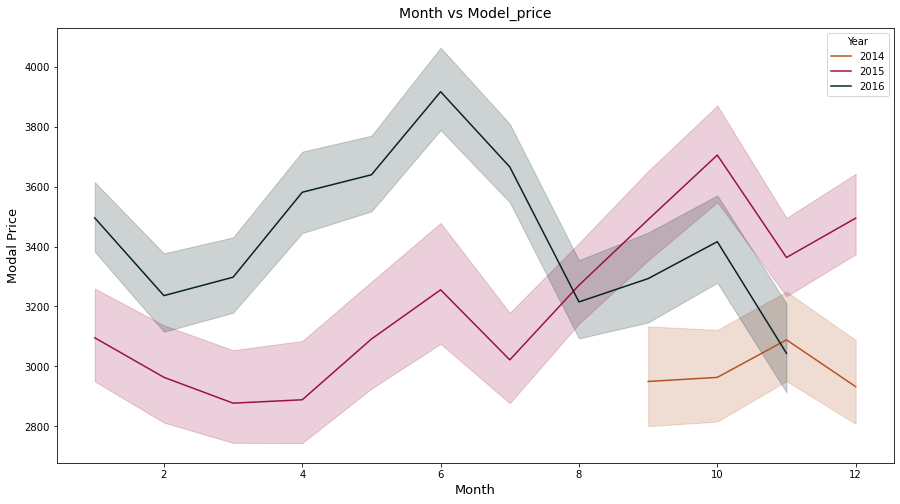

In [22]:
plt.figure(figsize=(15,8))
plt.title("Month vs Model_price", fontsize=14,pad=10)
sns.lineplot(data=df2, x=df2["Month"], y=df2["modal_price"],hue='Year',palette=['#B3541E', '#9C0F48','#072227'])
plt.xlabel("Month",fontsize=13)
plt.ylabel('Modal Price',fontsize=13)

In [23]:
#From graph :
#The values of 2014 start from september.
#The price given to farmers in 2015 increased after june but in 2016 it decreased after june.
#The model_price is highest in june of 2016.

Text(0, 0.5, 'In qunitals')

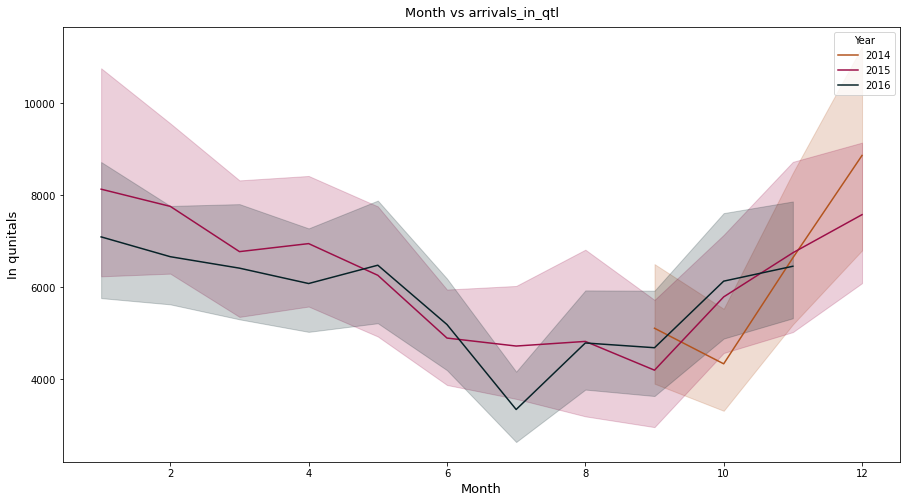

In [24]:
plt.figure(figsize=(15,8))
plt.title("Month vs arrivals_in_qtl",pad=10,fontsize=13)
sns.lineplot(data=df2, x=df2["Month"], y=df2["arrivals_in_qtl"],hue='Year',palette=['#B3541E', '#9C0F48','#072227'])
plt.xlabel("Month",fontsize=13)
plt.ylabel('In qunitals',fontsize=13)

In [25]:
#From graph :
#The arrival of crops decreases towards the mid months and increases towards the end months.
#The arrival of crops in 2016 is low, but the model_price was high.This indicates that there must be change in the price of commodity.

# Pre Processing

In [26]:
#1.First we need to check for null values
df.isna().sum()
#There was no null values 

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

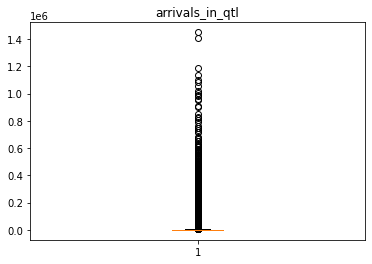

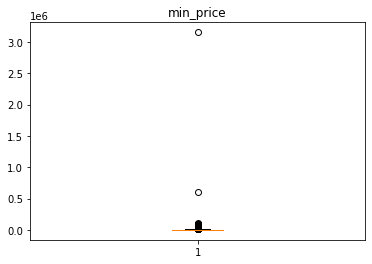

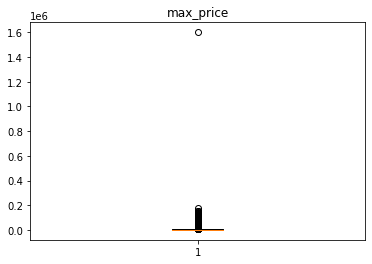

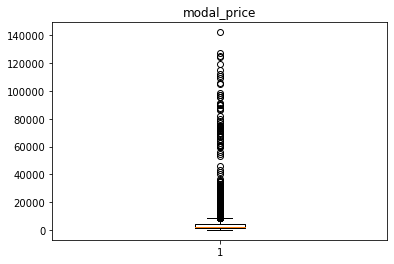

In [27]:
#2.Outlier detection
#Handling outliers
for i in ['arrivals_in_qtl', 'min_price','max_price', 'modal_price']:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

In [28]:
#There it shows more outliers in each 4 columns,so we nned to handle it first
#arrivals_qtl
Q1 = np.percentile(df['arrivals_in_qtl'],25, interpolation = 'midpoint')
Q2 = np.percentile(df['arrivals_in_qtl'],50, interpolation = 'midpoint')
Q3 = np.percentile(df['arrivals_in_qtl'],75, interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR

In [29]:
index=df['arrivals_in_qtl'][(df['arrivals_in_qtl']<low_lim)|(df['arrivals_in_qtl']>upp_lim)].index
df.drop(index,inplace = True)

In [30]:
#Min Price
Q1 = np.percentile(df['min_price'],25, interpolation = 'midpoint')
Q2 = np.percentile(df['min_price'],50, interpolation = 'midpoint')
Q3 = np.percentile(df['min_price'],75, interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR

In [31]:
index=df['min_price'][(df['min_price']<low_lim)|(df['min_price']>upp_lim)].index
df.drop(index,inplace = True)

In [32]:
#Max price
Q1 = np.percentile(df['max_price'],25, interpolation = 'midpoint')
Q2 = np.percentile(df['max_price'],50, interpolation = 'midpoint')
Q3 = np.percentile(df['max_price'],75, interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR

In [33]:
index=df['max_price'][(df['max_price']<low_lim)|(df['max_price']>upp_lim)].index
df.drop(index,inplace = True)

In [34]:
#Modal price
Q1 = np.percentile(df['modal_price'],25, interpolation = 'midpoint')
Q2 = np.percentile(df['modal_price'],50, interpolation = 'midpoint')
Q3 = np.percentile(df['modal_price'],75, interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR

In [35]:
index=df['modal_price'][(df['modal_price']<low_lim)|(df['modal_price']>upp_lim)].index
df.drop(index,inplace = True)

In [36]:
len(df)

48822

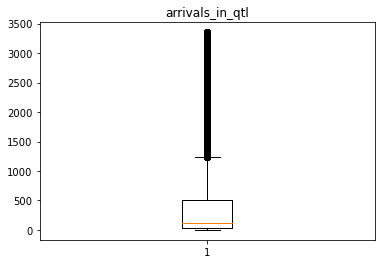

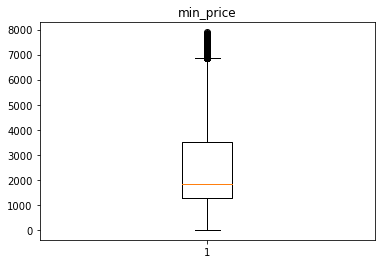

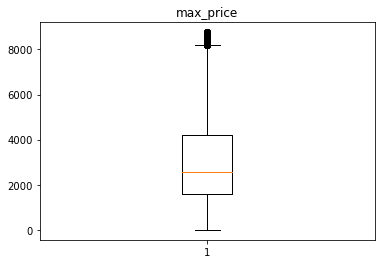

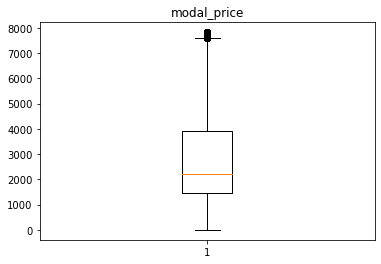

In [37]:
#Here we removed outliers and now we create boxplot
for i in ['arrivals_in_qtl', 'min_price','max_price', 'modal_price']:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

In [38]:
#3Checking for duplicates
duplicate = df[df.duplicated()]
duplicate.head()
#There is no duplicates in the dataset

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name


In [39]:
#4.Datatypes Correction
df.dtypes
#Date is not in datatype

APMC               object
Commodity          object
Year                int64
Month              object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
state_name         object
dtype: object

In [40]:
# Converting to date type
df['date'] =  pd.to_datetime(df['date'])

In [41]:
df.dtypes

APMC                       object
Commodity                  object
Year                        int64
Month                      object
arrivals_in_qtl             int64
min_price                   int64
max_price                   int64
modal_price                 int64
date               datetime64[ns]
district_name              object
state_name                 object
dtype: object

In [42]:
#5. Encoding
#One hot encoding
df3 = pd.get_dummies(df,columns=['Year'])
df3.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04-01,Ahmadnagar,Maharashtra,0,0,1


In [43]:
## Since there are lot of categories for APMC, Commodity and district name BaseN encoder is used
import category_encoders as ce

In [44]:
encoder= ce.BaseNEncoder(cols=['APMC','Commodity','district_name'],return_df=True,base=3)

In [45]:
## Before encoding
df3.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04-01,Ahmadnagar,Maharashtra,0,0,1


In [46]:
## To see all the columns of the dataset
pd.set_option('display.max_columns', None)

In [47]:
#After encoding
data_encoded=encoder.fit_transform(df3)
data_encoded.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,state_name,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,April,79,1406,1538,1463,2015-04-01,0,0,0,1,Maharashtra,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,April,106,1788,1925,1875,2016-04-01,0,0,0,1,Maharashtra,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,April,1253,1572,1890,1731,2015-04-01,0,0,0,1,Maharashtra,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,April,387,1750,2220,1999,2016-04-01,0,0,0,1,Maharashtra,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,April,2093,1695,2454,2119,2016-04-01,0,0,0,1,Maharashtra,0,0,1


In [48]:
## Droping unwanted column 
data_encoded=data_encoded.drop(['Month','state_name'],axis=1)

In [49]:
## Data types of the current dataframe
data_encoded.dtypes

APMC_0                      int64
APMC_1                      int64
APMC_2                      int64
APMC_3                      int64
APMC_4                      int64
APMC_5                      int64
Commodity_0                 int64
Commodity_1                 int64
Commodity_2                 int64
Commodity_3                 int64
Commodity_4                 int64
Commodity_5                 int64
arrivals_in_qtl             int64
min_price                   int64
max_price                   int64
modal_price                 int64
date               datetime64[ns]
district_name_0             int64
district_name_1             int64
district_name_2             int64
district_name_3             int64
Year_2014                   uint8
Year_2015                   uint8
Year_2016                   uint8
dtype: object

In [50]:
#6.Scaling
## Before scaling
data_encoded.describe()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
count,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000
mean,0.323584,0.661382,0.964811,0.809000,0.912724,0.957232,0.010385,0.169288,0.521179,0.616239,0.837778,1.127832,434.456925,2518.195916,3091.000922,2820.794969,0.219082,0.835771,0.897034,0.827926,0.130474,0.410614,0.458912
std,0.467848,0.826404,0.802609,0.789335,0.806117,0.779264,0.101376,0.471898,0.738271,0.762540,0.769271,0.834411,679.713121,1781.338440,1926.575827,1845.320987,0.413628,0.900435,0.795764,0.782291,0.336828,0.491950,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1265.000000,1574.000000,1446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,126.000000,1820.000000,2571.000000,2223.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,510.000000,3508.000000,4225.000000,3901.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3353.000000,7892.000000,8760.000000,7825.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [51]:
## Min max scalar
## Copy the data
df_min_max_scaled = data_encoded.copy()
columns=['arrivals_in_qtl','min_price','max_price','modal_price']
## Apply normalization techniques
for column in columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
## View normalized data
df_min_max_scaled.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,0.023270,0.178155,0.175571,0.186965,2015-04-01,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0.031325,0.226559,0.219749,0.239617,2016-04-01,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,0.373508,0.199189,0.215753,0.221214,2015-04-01,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,0.115155,0.221744,0.253425,0.255463,2016-04-01,0,0,0,1,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,0.624105,0.214774,0.280137,0.270799,2016-04-01,0,0,0,1,0,0,1


# Modelling

In [52]:
## Assigning depended and independent variables
x=df_min_max_scaled.drop(['modal_price','date'],axis=1)
y=df_min_max_scaled['modal_price']

In [53]:
## Splilting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# 1.Linear Regression

In [54]:
## Fitting the lr model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [55]:
## Predicting the values
y_pred=lr.predict(x_test)

In [56]:
## Checking the MSE and r2_score
from sklearn.metrics import mean_squared_error,r2_score
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0007190638690214208
r squared: 0.9872817388926115


In [57]:
temp=[]
temp.append(["Linear Regression",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

In [58]:
## Checking the y_test
y_test[0:5]

6775     0.178914
10202    0.469521
58181    0.570990
8369     0.202939
36694    0.203834
Name: modal_price, dtype: float64

In [59]:
## Checking the y_pred
y_pred[0:5]

array([0.17554806, 0.45950326, 0.56511326, 0.1997121 , 0.20814715])

# 2.SVR

In [60]:
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')

# Training of the regression model
svr_rbf.fit(x_train, y_train)
y_pred = svr_rbf.predict(x_test)


In [61]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.009361494479260685
r squared: 0.8344209238260769


In [62]:
temp.append(["SVR",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

# 3.Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(x_train,y_train)

y_pred=rm.predict(x_test)

In [64]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0005062638984554539
r squared: 0.9910455847843342


In [65]:
temp.append(["RandomForestRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

# 4.Decision Tree Algorithm

In [66]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [67]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.000951219974386324
r squared: 0.9831755362409283


In [68]:
temp.append(["DecisionTreeRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

In [69]:
df4 = pd.DataFrame(temp, columns = ['Algorithms', 'MSE','r2_score'])

In [70]:
df4.sort_values(by=['MSE','r2_score'])

,Algorithms,MSE,r2_score
2,RandomForestRegressor,0.00051,0.99105
0,Linear Regression,0.00072,0.98728
3,DecisionTreeRegressor,0.00095,0.98318
1,SVR,0.00936,0.83442


In [71]:
#From above RandomForestRegressor has lowest MSE and highest r2_score. So it is the best algorithm for this problem.

# Model Fine Tuning

In [72]:
# Using gridsearch to find the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True,False], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,150]}

In [73]:
g_search = GridSearchCV(estimator = rm, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [77]:
## Fitting and printing the best parameters
g_search.fit(x_train,y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 150}


In [78]:
rm=RandomForestRegressor(bootstrap=True, max_features='auto',n_estimators=150)
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)

In [79]:
## slight improvement
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0005037100219315792
r squared: 0.9910907558322286
